In [1]:
import pickle

import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ADMIN\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Getting Datasets

In [2]:
pickle_in = open("trainX.pickle","rb")
X = pickle.load(pickle_in)

pickle_in_2 = open("testX.pickle", "rb")
x_test_final = pickle.load(pickle_in_2)

pickle_in_3 = open("trainY.pickle", "rb")
y = pickle.load(pickle_in_3)

In [3]:
X.shape

(60000, 28, 28)

In [4]:
y.shape

(60000,)

In [5]:
x_test_final.shape

(10000, 28, 28)

### Showing the data

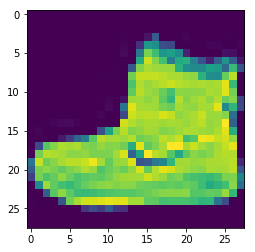

In [6]:
plt.imshow(X[0])

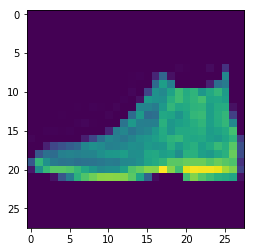

In [7]:
#test data
plt.imshow(x_test_final[0])

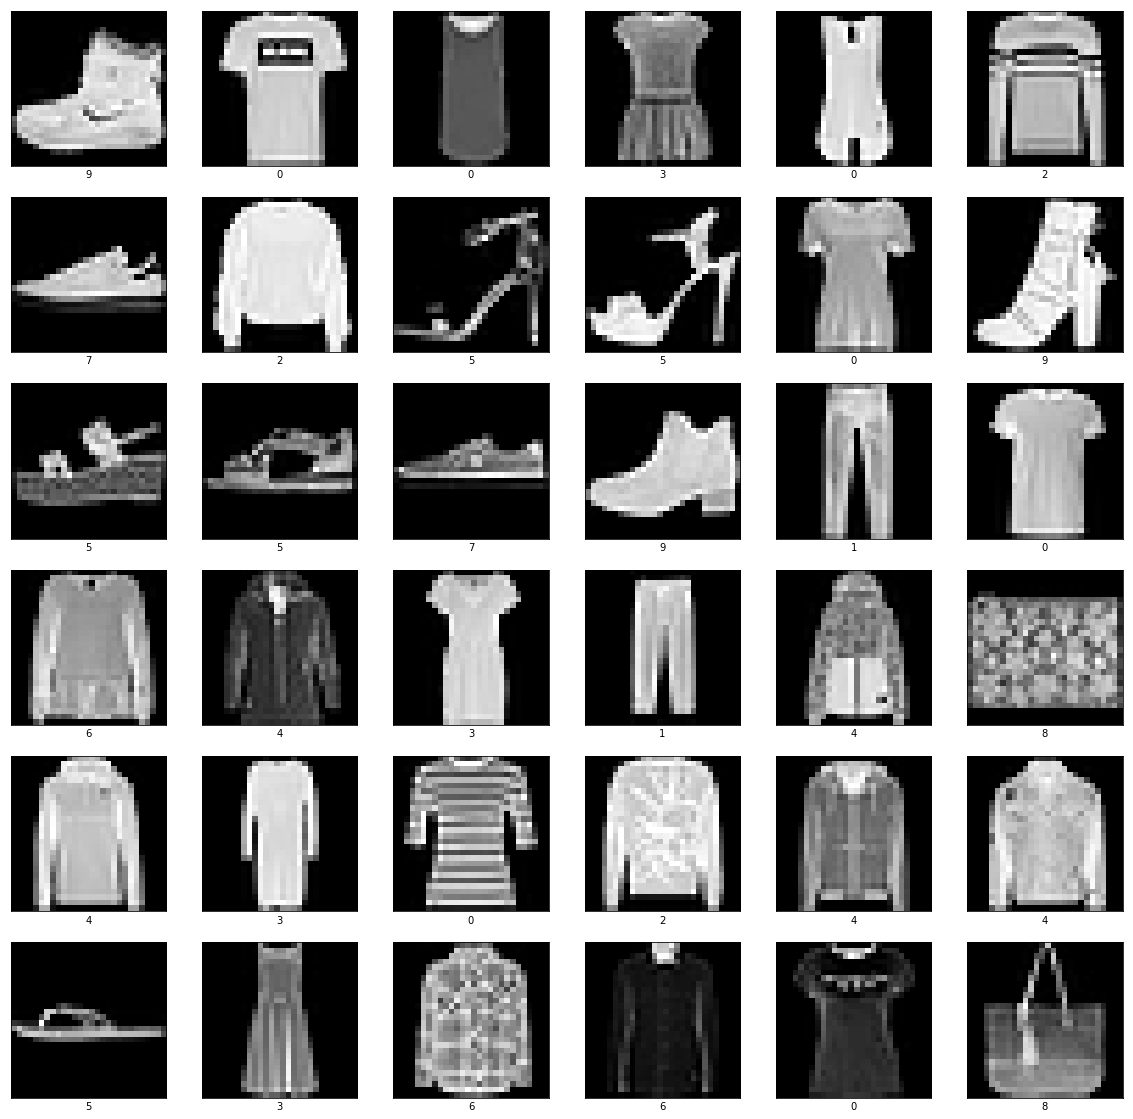

In [8]:
plt.figure(figsize=(20,20))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap='gist_gray')
    plt.xlabel(y[i])
plt.show()

#### All the images in our X are clothes and y are the categories

### Dividing the dataset of X and y into train and test dataset
this is done to find the best model by comparing their accuracies

In [9]:
#input image dimensions
img_rows, img_cols = 28, 28

#the data shuffled and split between train and test sets
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
X_train.shape

(45000, 28, 28)

In [11]:
y_train.shape

(45000,)

In [12]:
X_test.shape

(15000, 28, 28)

In [13]:
y_test.shape

(15000,)

In [14]:
X_train = X_train.reshape((45000, 784))
X_train.shape

(45000, 784)

### Checking Data Convention

In [15]:
K.image_data_format()

'channels_last'

In [16]:
if K.image_data_format() =='channels_first':
  X_train = X_train.reshape(X_train.shape[0],1,img_rows,img_cols)
  X_test = X_test.reshape(X_test.shape[0],1,img_rows,img_cols)
  input_shape = (1,img_rows, img_cols)
  
else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
  input_shape=(img_rows, img_cols, 1)

In [17]:
print(input_shape)

(28, 28, 1)


### Normalizing The Range of Data from 0-255 to 0-1

In [18]:
batch_size = 128
num_classes = 10
epochs = 10

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /=255
X_test /=255
print('X_train shape: ', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train shape:  (45000, 28, 28)
45000 train samples
15000 test samples


In [20]:
X_train = np.reshape(X_train, (45000, 784))
X_test = np.reshape(X_test, (15000, 784))

### Checking Accuracy of our Model

In [21]:
model = Sequential()
model.add(Dense(500, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 

In [22]:
model.fit(X_train,y_train,batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_test,y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print(('Test loss: ', score[0]))
print('Test accuracy', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 15000 samples
Epoch 1/5
45000/45000 [==============================] - 11s 247us/step - loss: 0.5997 - acc: 0.7826 - val_loss: 0.4114 - val_acc: 0.8507
Epoch 2/5
45000/45000 [==============================] - 14s 308us/step - loss: 0.4086 - acc: 0.8491 - val_loss: 0.5141 - val_acc: 0.8169
Epoch 3/5
45000/45000 [==============================] - 9s 209us/step - loss: 0.3621 - acc: 0.8650 - val_loss: 0.3792 - val_acc: 0.8576
Epoch 4/5
45000/45000 [==============================] - 9s 206us/step - loss: 0.3308 - acc: 0.8771 - val_loss: 0.3403 - val_acc: 0.8753
Epoch 5/5
45000/45000 [==============================] - 9s 200us/step - loss: 0.3049 - acc: 0.8866 - val_loss: 0.4395 - val_acc: 0.8214
('Test loss: ', 0.4394963151931763)
Test accuracy 0.8214


In [23]:
model.fit(X_train,y_train,batch_size=batch_size,epochs=10,verbose=1,validation_data=(X_test,y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print(('Test loss: ', score[0]))
print('Test accuracy', score[1])

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 10s 216us/step - loss: 0.2880 - acc: 0.8917 - val_loss: 0.3558 - val_acc: 0.8728
Epoch 2/10
45000/45000 [==============================] - 9s 207us/step - loss: 0.2728 - acc: 0.8980 - val_loss: 0.4411 - val_acc: 0.8313s: 0.2727 - acc: 0.8
Epoch 3/10
45000/45000 [==============================] - 9s 200us/step - loss: 0.2565 - acc: 0.9040 - val_loss: 0.4337 - val_acc: 0.8538
Epoch 4/10
45000/45000 [==============================] - 9s 198us/step - loss: 0.2441 - acc: 0.9081 - val_loss: 0.3151 - val_acc: 0.8860
Epoch 5/10
45000/45000 [==============================] - 9s 198us/step - loss: 0.2337 - acc: 0.9109 - val_loss: 0.3111 - val_acc: 0.8901
Epoch 6/10
45000/45000 [==============================] - 9s 203us/step - loss: 0.2239 - acc: 0.9159 - val_loss: 0.3566 - val_acc: 0.8778
Epoch 7/10
45000/45000 [==============================] - 10s 223us/step - loss: 0.2134 - acc: 0.9195

In [24]:
model.fit(X_train,y_train,batch_size=batch_size,epochs=15,verbose=1,validation_data=(X_test,y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print(('Test loss: ', score[0]))
print('Test accuracy', score[1])

Train on 45000 samples, validate on 15000 samples
Epoch 1/15
45000/45000 [==============================] - 9s 207us/step - loss: 0.1798 - acc: 0.9311 - val_loss: 0.3921 - val_acc: 0.8644
Epoch 2/15
45000/45000 [==============================] - 9s 207us/step - loss: 0.1724 - acc: 0.9332 - val_loss: 0.3148 - val_acc: 0.8945
Epoch 3/15
45000/45000 [==============================] - 9s 209us/step - loss: 0.1657 - acc: 0.9380 - val_loss: 0.3338 - val_acc: 0.8960
Epoch 4/15
45000/45000 [==============================] - 10s 227us/step - loss: 0.1597 - acc: 0.9383 - val_loss: 0.3603 - val_acc: 0.8877
Epoch 5/15
45000/45000 [==============================] - 9s 207us/step - loss: 0.1530 - acc: 0.9423 - val_loss: 0.3412 - val_acc: 0.8883
Epoch 6/15
45000/45000 [==============================] - 9s 208us/step - loss: 0.1455 - acc: 0.9441 - val_loss: 0.3881 - val_acc: 0.8859
Epoch 7/15
45000/45000 [==============================] - 9s 207us/step - loss: 0.1399 - acc: 0.9465 - val_loss: 0.3533 -

#### Accuracy was  best with 10 epochs, i.e., 89.6%

### Predicting values

In [25]:
X_train_final = X.astype('float32')
X_test_final = x_test_final.astype('float32')

X_train_final /=255
X_test_final /=255
print('X_train shape: ', X_train_final.shape)
print(X_train_final.shape[0], 'train samples')
print(X_test_final.shape[0], 'test samples')

y_train_final = keras.utils.to_categorical(y, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

X_train shape:  (60000, 28, 28)
60000 train samples
10000 test samples


In [26]:
 y_train_final.shape

(60000, 10)

In [27]:
X_test_final.shape

(10000, 28, 28)

In [28]:
X_train_final = np.reshape(X_train_final, (60000, 784))
X_test_final = np.reshape(X_test_final, (10000, 784))

In [29]:
model.fit(X_train_final,y_train_final,batch_size=batch_size,epochs=10,verbose=1)

#score = model.evaluate(X_test_final, y_test, verbose=0)
#print(('Test loss: ', score[0]))
#print('Test accuracy', score[1])

Epoch 1/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.1811 - acc: 0.9383
Epoch 2/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.1595 - acc: 0.9441
Epoch 3/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.1492 - acc: 0.9464
Epoch 4/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.1388 - acc: 0.9496
Epoch 5/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.1326 - acc: 0.9518
Epoch 6/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.1266 - acc: 0.95390s - loss: 0.1263 
Epoch 7/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.1206 - acc: 0.9556
Epoch 8/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.1146 - acc: 0.9585
Epoch 9/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.1107 - acc: 0.9598
Epoch 10/10
60000/60000 [==============================] - 13s 2

In [30]:
y_pred_test_data = model.predict_classes(X_test_final)

In [31]:
y_pred_test_data.shape

(10000,)

In [32]:
y.shape

(60000,)

In [33]:
y_pred_test_data

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

### Saving the output in pickle file

In [34]:
pickle_out=open("y_pred.pickle","wb")
pickle.dump(y_pred_test_data,pickle_out)
pickle_out.close()

### Closing the Pickle files

In [36]:
pickle_in.close()
pickle_in_2.close()
pickle_in_3.close()